<a href="https://colab.research.google.com/github/gustavopierre/data_science_portfolio/blob/master/Modulo4_series_temporais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise e Previsão de Séries Temporais/*Time Series Analysis and Forecasting***

## **Aula/Class 01** - Série Temporal/*Time Series*

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# opening csv data file abaou tuberculosis to dataframe
URL_TUBERCULOSIS = "https://github.com/gustavopierre/data_science_portfolio/raw/master/A130749189_28_143_208.csv"

data_tuberculosis = pd.read_csv(URL_TUBERCULOSIS,encoding="ISO-8859-1", sep=";", skiprows=3, skipfooter=16, engine="python")
data_tuberculosis.head()

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,Total
0,2001,8088,6542,8095,7305,7656,6805,6987,8065,6697,7524,6874,6627,87265
1,2002,8013,7346,7961,8771,7784,6713,7746,8330,7654,8200,7532,6809,92859
2,2003,8115,7985,7474,7975,8024,7082,7949,7585,8136,8521,7624,7303,93773
3,2004,7574,6743,8574,8089,7763,7314,7825,8232,7901,8016,7753,7196,92980
4,2005,7432,6748,8441,7958,8019,7781,7282,8391,7690,7186,7587,7541,92056


In [3]:
data_tuberculosis.tail()

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,Total
15,2016,7116,6800,8067,7360,7315,7527,6991,7702,7030,6588,7039,6672,86207
16,2017,7481,6803,8680,6780,8091,7394,7225,8110,7447,7809,7451,7020,90291
17,2018,7881,6821,7901,8121,7892,7720,8109,8934,7663,8701,7711,6900,94354
18,2019,8392,7754,7648,8274,8383,7363,8382,8239,8143,8592,7615,7220,96005
19,Total,142969,129386,149875,143199,143264,133444,141800,149952,140241,144870,136864,128893,1684757


In [4]:
# deleting column "Total"
data_tuberculosis.drop("Total", axis=1, inplace=True)
# deleting row "Total"
data_tuberculosis.drop(19, inplace=True)
data_tuberculosis

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez
0,2001,8088,6542,8095,7305,7656,6805,6987,8065,6697,7524,6874,6627
1,2002,8013,7346,7961,8771,7784,6713,7746,8330,7654,8200,7532,6809
2,2003,8115,7985,7474,7975,8024,7082,7949,7585,8136,8521,7624,7303
3,2004,7574,6743,8574,8089,7763,7314,7825,8232,7901,8016,7753,7196
4,2005,7432,6748,8441,7958,8019,7781,7282,8391,7690,7186,7587,7541
5,2006,7385,6687,8132,6804,7593,6984,7101,7722,6793,7005,6674,6151
6,2007,7342,6204,8115,7266,7368,6591,7184,7564,6712,7465,6695,6094
7,2008,7355,6646,7278,7612,6895,6929,7688,7797,7631,7564,6799,6574
8,2009,7113,6452,8146,7514,7168,6702,7443,7368,7388,7285,7016,6723
9,2010,6912,6403,8308,7049,6973,6621,7128,7389,7165,7210,7047,7176


In [5]:
# transforming data in time series 
data_tuberculosis_ts = data_tuberculosis.melt(id_vars="Ano Diagnóstico", value_name="cases", var_name="month")
data_tuberculosis_ts

,Ano Diagnóstico,month,cases
0,2001,Jan,8088
1,2002,Jan,8013
2,2003,Jan,8115
3,2004,Jan,7574
4,2005,Jan,7432
...,...,...,...
223,2015,Dez,6844
224,2016,Dez,6672
225,2017,Dez,7020
226,2018,Dez,6900


## **Aula/Class 02** - Manipulação de Datas/ *Date Manipulation*

In [6]:
# changing Portuguese month names to English month names
months_port_eng = {
    "Jan": "Jan",
    "Fev": "Feb",
    "Mar": "Mar",
    "Abr": "Apr",
    "Mai": "May",
    "Jun": "Jun",
    "Jul": "Jul",
    "Ago": "Aug",
    "Set": "Sep",
    "Out": "Oct",
    "Nov": "Nov",
    "Dez": "Dec"
}

data_tuberculosis_ts['month'] = data_tuberculosis_ts['month'].map(months_port_eng)
data_tuberculosis_ts.sample(10)

,Ano Diagnóstico,month,cases
174,2004,Oct,8016
217,2009,Dec,6723
191,2002,Nov,7532
38,2001,Mar,8095
204,2015,Nov,7287
123,2010,Jul,7128
104,2010,Jun,6621
56,2019,Mar,7648
167,2016,Sep,7030
193,2004,Nov,7753


In [7]:
# creating date feature
data_tuberculosis_ts['date'] = data_tuberculosis_ts["Ano Diagnóstico"] + "-" + data_tuberculosis_ts["month"]

data_tuberculosis_ts.sample(10)

,Ano Diagnóstico,month,cases,date
13,2014,Jan,7670,2014-Jan
19,2001,Feb,6542,2001-Feb
126,2013,Jul,7379,2013-Jul
123,2010,Jul,7128,2010-Jul
212,2004,Dec,7196,2004-Dec
135,2003,Aug,7585,2003-Aug
220,2012,Dec,6302,2012-Dec
2,2003,Jan,8115,2003-Jan
174,2004,Oct,8016,2004-Oct
58,2002,Apr,8771,2002-Apr


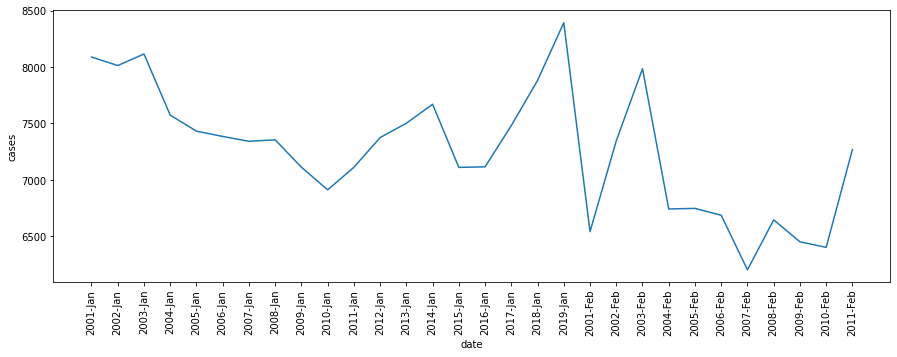

In [8]:
# show line graphic
plt.figure(figsize=(15,5))
sns.lineplot(x="date", y="cases", data=data_tuberculosis_ts[:30])
plt.xticks(rotation=90)
plt.show()

In [9]:
# verifying the types of the features
data_tuberculosis_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Ano Diagnóstico  228 non-null    object
 1   month            228 non-null    object
 2   cases            228 non-null    int64 
 3   date             228 non-null    object
dtypes: int64(1), object(3)
memory usage: 7.2+ KB


In [10]:
# transforming object in datetime
data_tuberculosis_ts["date"] = pd.to_datetime(data_tuberculosis_ts["date"])

In [11]:
data_tuberculosis_ts.sample(10)

,Ano Diagnóstico,month,cases,date
221,2013,Dec,6335,2013-12-01
47,2010,Mar,8308,2010-03-01
181,2011,Oct,6994,2011-10-01
103,2009,Jun,6702,2009-06-01
41,2004,Mar,8574,2004-03-01
226,2018,Dec,6900,2018-12-01
205,2016,Nov,7039,2016-11-01
74,2018,Apr,8121,2018-04-01
167,2016,Sep,7030,2016-09-01
124,2011,Jul,7079,2011-07-01


In [12]:
data_tuberculosis_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Ano Diagnóstico  228 non-null    object        
 1   month            228 non-null    object        
 2   cases            228 non-null    int64         
 3   date             228 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 7.2+ KB


In [13]:
# deleting features unnecessary
data_tuberculosis_ts = data_tuberculosis_ts[["date", "cases"]]
data_tuberculosis_ts.sample(10)

,date,cases
105,2011-06-01,6940
182,2012-10-01,7606
95,2001-06-01,6805
15,2016-01-01,7116
132,2019-07-01,8382
224,2016-12-01,6672
144,2012-08-01,8014
12,2013-01-01,7502
211,2003-12-01,7303
34,2016-02-01,6800


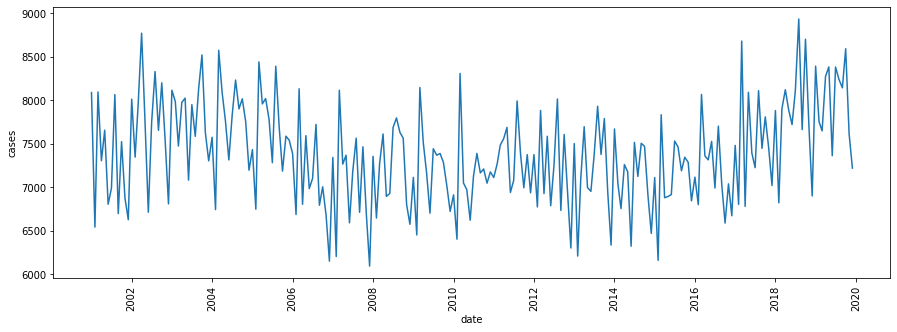

In [14]:
# show the line graphic
plt.figure(figsize=(15,5))
sns.lineplot(x="date", y="cases", data=data_tuberculosis_ts)
plt.xticks(rotation=90)
plt.show()

---
### **Desafio 01:** Transformar os dados em uma série temporal Ano-Mês.

---
### **Desafio 02:** Converter a data (String) em Datetime

---
### **Desafio 03:** Faça a mesma transformação realizada em aula nas datas para a base de dados de Hanseníase.

In [15]:
PATH_LEPROSYS = "https://github.com/gustavopierre/data_science_portfolio/raw/master/A112853189_28_143_208.csv"
data_leprosys = pd.read_csv(PATH_LEPROSYS, sep=";", encoding="ISO-8859-1", skiprows=3, skipfooter=10, engine="python", na_values="-")
data_leprosys

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,Total
0,<1975,28.0,8.0,12.0,14.0,14.0,17.0,17.0,14.0,12.0,23.0,21.0,21.0,201
1,1975,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2
2,1976,NaN,NaN,NaN,2.0,1.0,2.0,NaN,NaN,2.0,NaN,1.0,NaN,8
3,1977,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,5
4,1978,NaN,NaN,NaN,NaN,NaN,2.0,1.0,2.0,NaN,1.0,NaN,NaN,6
5,1979,2.0,1.0,1.0,NaN,NaN,1.0,3.0,3.0,2.0,3.0,NaN,NaN,16
6,1980,2.0,NaN,3.0,2.0,NaN,1.0,NaN,1.0,2.0,1.0,2.0,NaN,14
7,1981,2.0,2.0,1.0,1.0,1.0,2.0,NaN,NaN,1.0,3.0,NaN,NaN,13
8,1982,2.0,NaN,NaN,1.0,2.0,1.0,NaN,NaN,NaN,1.0,NaN,1.0,8
9,1983,4.0,NaN,4.0,NaN,1.0,NaN,NaN,2.0,2.0,1.0,1.0,2.0,17


In [16]:
data_leprosys.drop("Total", axis=1, inplace=True)

In [17]:
data_leprosys.drop(46, inplace=True)
data_leprosys.drop(0, inplace=True)

In [18]:
data_leprosys

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez
1,1975,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,1976,NaN,NaN,NaN,2.0,1.0,2.0,NaN,NaN,2.0,NaN,1.0,NaN
3,1977,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN
4,1978,NaN,NaN,NaN,NaN,NaN,2.0,1.0,2.0,NaN,1.0,NaN,NaN
5,1979,2.0,1.0,1.0,NaN,NaN,1.0,3.0,3.0,2.0,3.0,NaN,NaN
6,1980,2.0,NaN,3.0,2.0,NaN,1.0,NaN,1.0,2.0,1.0,2.0,NaN
7,1981,2.0,2.0,1.0,1.0,1.0,2.0,NaN,NaN,1.0,3.0,NaN,NaN
8,1982,2.0,NaN,NaN,1.0,2.0,1.0,NaN,NaN,NaN,1.0,NaN,1.0
9,1983,4.0,NaN,4.0,NaN,1.0,NaN,NaN,2.0,2.0,1.0,1.0,2.0
10,1984,NaN,3.0,1.0,2.0,NaN,2.0,2.0,1.0,NaN,2.0,NaN,NaN


In [19]:
data_leprosys_ts = data_leprosys.melt(id_vars="Ano Diagnóstico", var_name="month", value_name="cases")
data_leprosys_ts

,Ano Diagnóstico,month,cases
0,1975,Jan,NaN
1,1976,Jan,NaN
2,1977,Jan,2.0
3,1978,Jan,NaN
4,1979,Jan,2.0
...,...,...,...
535,2015,Dez,2412.0
536,2016,Dez,2213.0
537,2017,Dez,2448.0
538,2018,Dez,2268.0


In [20]:
data_leprosys_ts.dropna(inplace=True)
data_leprosys_ts.sample(10)

,Ano Diagnóstico,month,cases
155,1995,Abr,4.0
488,2013,Nov,3164.0
22,1997,Jan,20.0
380,1995,Set,10.0
215,2010,Mai,3969.0
427,1997,Out,18.0
285,1990,Jul,1.0
238,1988,Jun,5.0
80,2010,Fev,3340.0
350,2010,Ago,3947.0


In [21]:
data_leprosys_ts['month'] = data_leprosys_ts["month"].map(months_port_eng)
data_leprosys_ts.sample(10)

,Ano Diagnóstico,month,cases
192,1987,May,1.0
88,2018,Feb,2877.0
469,1994,Nov,7.0
284,1989,Jul,2.0
510,1990,Dec,5.0
365,1980,Sep,2.0
393,2008,Sep,4472.0
123,2008,Mar,3781.0
312,2017,Jul,2739.0
281,1986,Jul,2.0


In [22]:
data_leprosys_ts["date"] = data_leprosys_ts['Ano Diagnóstico'] + "-" + data_leprosys_ts['month']
data_leprosys_ts.sample(10)

,Ano Diagnóstico,month,cases,date
28,2003,Jan,4127.0,2003-Jan
368,1983,Sep,2.0,1983-Sep
407,1977,Oct,1.0,1977-Oct
462,1987,Nov,2.0,1987-Nov
431,2001,Oct,4728.0,2001-Oct
383,1998,Sep,31.0,1998-Sep
45,1975,Feb,1.0,1975-Feb
373,1988,Sep,2.0,1988-Sep
63,1993,Feb,6.0,1993-Feb
59,1989,Feb,3.0,1989-Feb


In [23]:
data_leprosys_ts = data_leprosys_ts[["date", "cases"]]
data_leprosys_ts.sample(10)

,date,cases
19,1994-Jan,8.0
201,1996-May,12.0
481,2006-Nov,4206.0
419,1989-Oct,7.0
444,2014-Oct,3525.0
121,2006-Mar,5168.0
274,1979-Jul,3.0
349,2009-Aug,4070.0
331,1991-Aug,4.0
131,2016-Mar,3000.0


In [24]:
data_leprosys_ts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 462 entries, 2 to 539
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    462 non-null    object 
 1   cases   462 non-null    float64
dtypes: float64(1), object(1)
memory usage: 10.8+ KB


In [25]:
data_leprosys_ts.head()

,date,cases
2,1977-Jan,2.0
4,1979-Jan,2.0
5,1980-Jan,2.0
6,1981-Jan,2.0
7,1982-Jan,2.0


In [26]:
data_leprosys_ts["date"] = pd.to_datetime(data_leprosys_ts["date"])
data_tuberculosis_ts["date"] = pd.to_datetime(data_tuberculosis_ts["date"])
data_leprosys_ts.sample(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,cases
503,1983-12-01,2.0
521,2001-12-01,3250.0
305,2010-07-01,3370.0
222,2017-05-01,3243.0
247,1997-06-01,21.0
65,1995-02-01,2.0
223,2018-05-01,3237.0
447,2017-10-01,3275.0
260,2010-06-01,3333.0
359,2019-08-01,3107.0


---
### **Desafio 04:** Configurar o gráfico de número de casos para deixá-lo mais elegante, analisar junto com um gráfico dos dados de hanseníase e compartilhar no discord suas hipóteses

## **Aula/*Class* 3** - Iniciando a Análise de Série Temporal/*Begining the Time Serie Analysis*